# Bias-Variance Tradeoff

## Reference
 
 - https://www.youtube.com/watch?v=pvcEQfcO3pk (stanford youtube)
 - ISLR

## Concept

* Bias-Variance Tradeoff is a fundamental concept of Machine Learning to address challenges of model performance and generalization.
 
 There are 2 concepts in Bias-Variance Tradeoff 

## Bias Error
 
 * Bias is explained by inabilty to capture the true relationship between dependent and independent variable.
 
 * It means approximation of real world problem with a generalized/simple model
 
 * High bias means model made significant assumptions about data that it doesn't actually learn the underlying pattern or complexity of real world data.
 
 * In essence model was `too simple` that it couldn't learn the pattern and resulted in `underfitting`. This model will perform poorly on both training data as well as testing data

## Variance Error
 
 * differene in model fit and actual values of the dataset. 
 
 * High Variance means that the model is flexible(complex) and fits training data closely (`even captures random fluctuations`)
 
 * The amount at which model fit will change it we change the training data, If a method has high variance then a small change in training data can result in large change in model fit.
 
 * In essence model was `too complex` that it learnt every possible pattern and resulted in `overfitting`. This model will perform well on training data but can perform poorly on testing or on real world data.

## Data Prep

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression 
import matplotlib.pyplot as plt

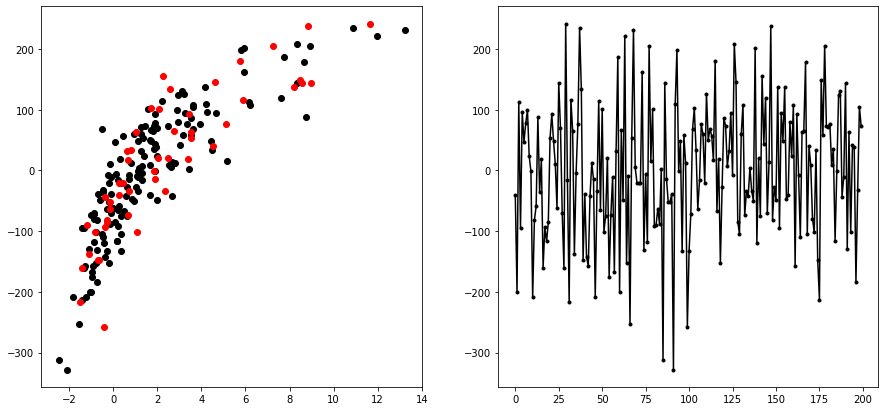

In [82]:
sample_size = 200
train_size = 0.75 # 70%

X, y = make_regression(n_samples=sample_size, n_features=1, noise=50, random_state=0, shuffle=True)
X = X + np.exp(X)

np.random.seed(0)
random_idxs = np.random.permutation(np.arange(0, sample_size))[: int(np.ceil(sample_size * train_size))]
random_idxs.sort()

X_train, y_train = X[random_idxs], y[random_idxs]
X_test, y_test = np.delete(X, random_idxs, axis=0), np.delete(y, random_idxs, axis=0)

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].plot(X_train, y_train, 'ko')
ax[0].plot(X_test, y_test, 'ro')

ax[1].plot(y, 'k.-')

plt.show()

## Modeling

using polynomial regression with increasing number of degrees for simple to complex(more flexible) model.

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

In [84]:
def model_performance(X_train, X_test, y_train, y_test, poly_degree):
    
    model = make_pipeline(PolynomialFeatures(degree=poly_degree, include_bias=False), LinearRegression())    
    model.fit(X_train, y_train)
    y_train_hat = model.predict(X_train)
    y_test_hat = model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_train_hat)
    mse_test = mean_squared_error(y_test, y_test_hat)

    return None, mse_train, mse_test

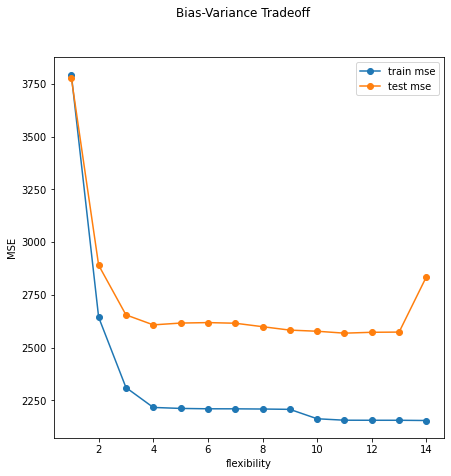

In [90]:

mse_train_list = []
mse_test_list = []
poly_degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

for degree in poly_degrees:
    _, mse_train, mse_test = model_performance(X_train, X_test, y_train, y_test, degree)
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

ax.plot(poly_degrees, mse_train_list, 'o-', label='train mse')
ax.plot(poly_degrees, mse_test_list, 'o-', label='test mse')

ax.set_xlabel('flexibility')
ax.set_ylabel('MSE')

plt.suptitle("Bias-Variance Tradeoff")
plt.legend()
plt.show()

* On left side, the model is really simple(degree 1 polynomial regression), shows high bias, performed poor on both train and test data.

* On right side, the model is more complex(degree 14 polynomial regression), shows high variance, performed well on training data(low mse), but performed poorly on test data.